###  Predicting Calories Burnt During a Workout Session

The aim of this project is to predict the calories burnt during a workout session, the project is a regression analysis project, where we would train our regression models using the feature variables provided in the dataset.

The dataset is downloaded from kaggle and is being added to the folder of this project for easy accessibility

In [1]:
#importing the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

### DATA UNDERSTANDING

In [2]:
#Read the csv file as df

df = pd.read_csv('Exercise.csv')

In [3]:
#Check the head of the dataframe

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [4]:
#Check the information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#Check the statistical information of the numerical values and Transpose using the .T

df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [6]:
#Check for missing data in every column

df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

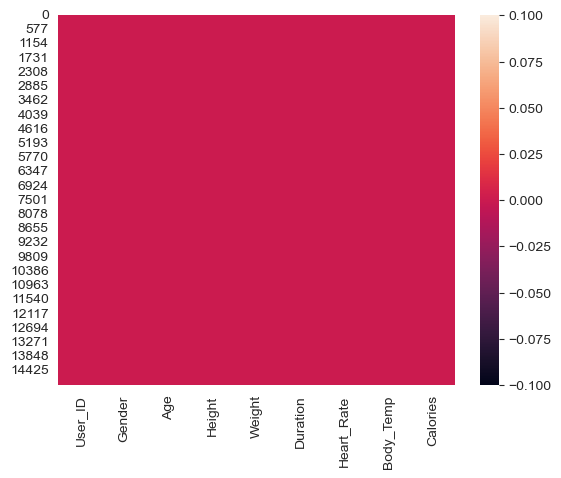

In [7]:
#Visualizing it in an heatmap

sns.heatmap(df.isna())
plt.show()

From the above information, we can clearly deduce that there are no missing values in the dataset.

### EXPLORATORY DATA ANALYSIS

In [8]:
#Get the columns of the dataset

df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [9]:
#Seperating the columns into numerical and categorical values

num_col = df.select_dtypes('number').columns
cat_col = df.select_dtypes('object').columns

In [10]:
num_col,cat_col

(Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
        'Body_Temp', 'Calories'],
       dtype='object'),
 Index(['Gender'], dtype='object'))

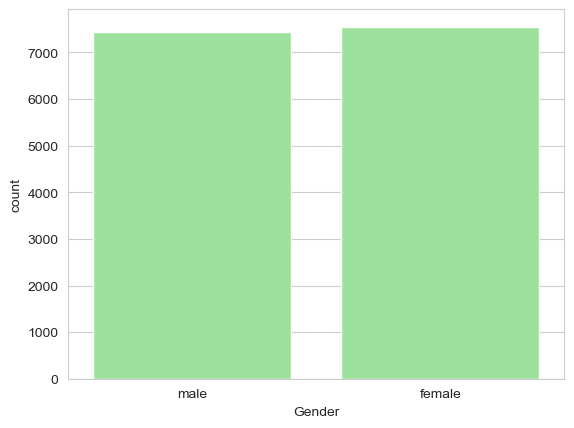

In [11]:
#Visualize the Gender category

sns.countplot(x='Gender', data=df, color='lightgreen')
plt.show()

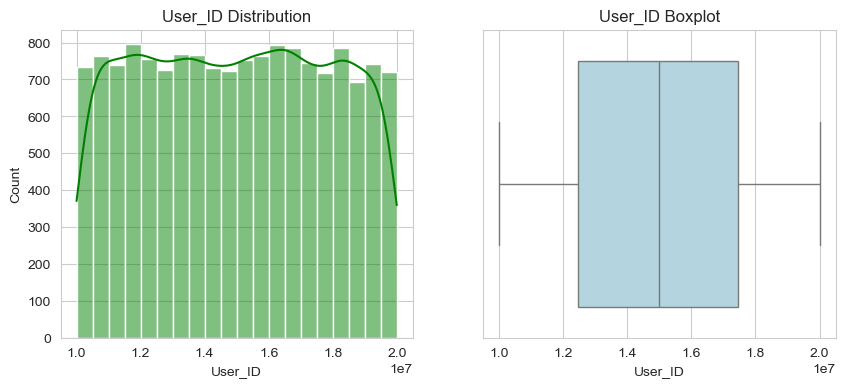

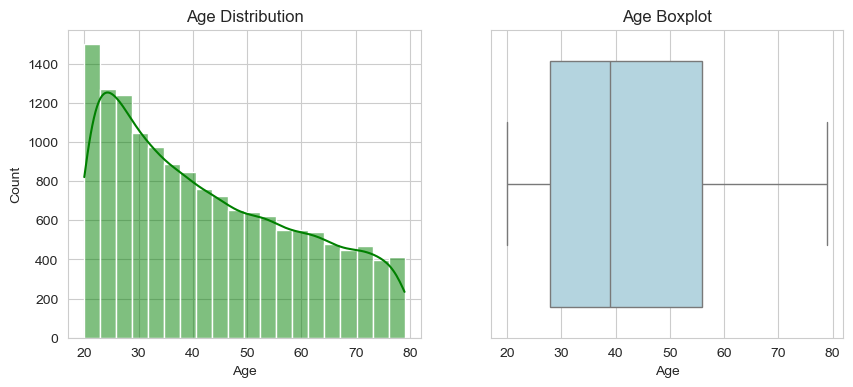

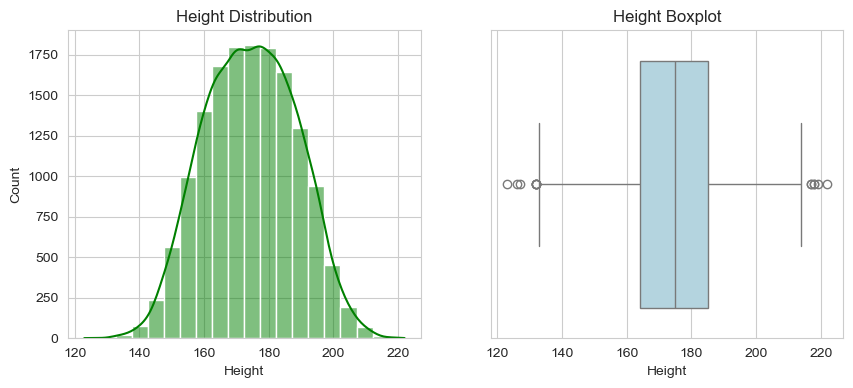

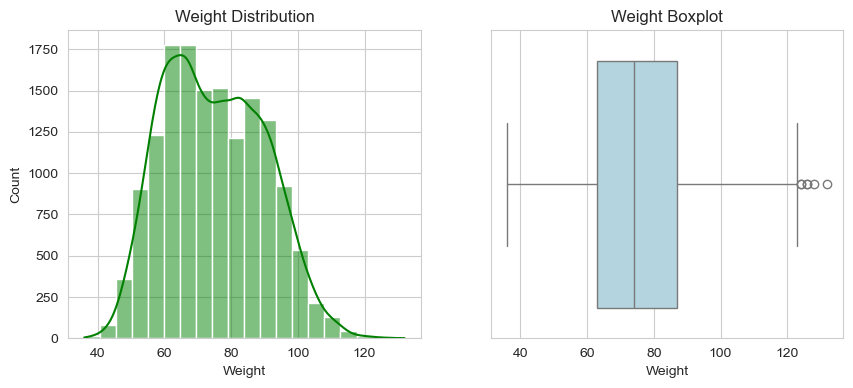

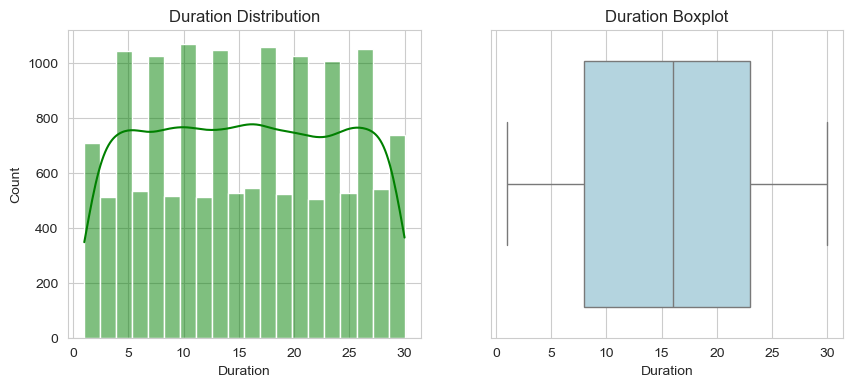

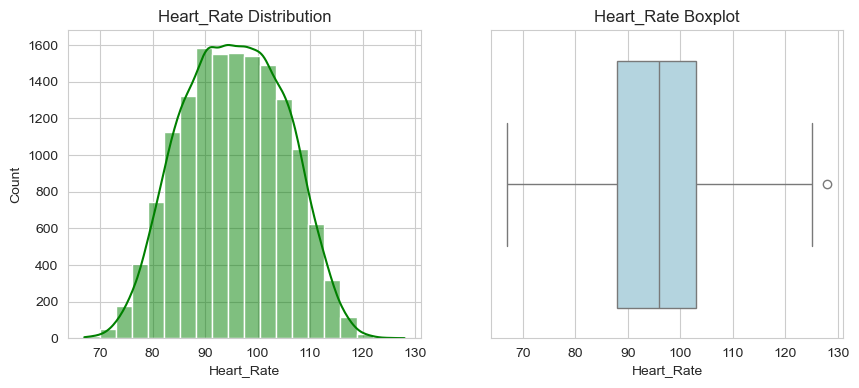

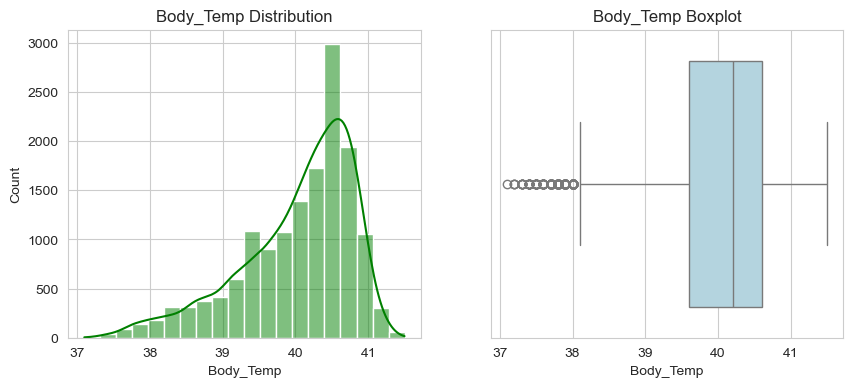

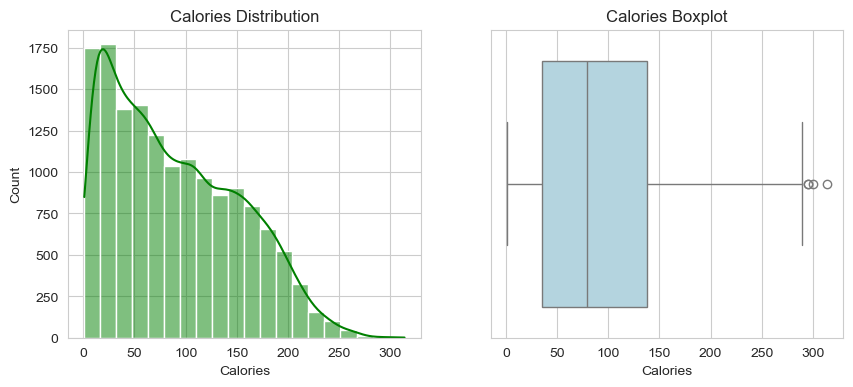

In [12]:
#Visualize the numerical columns

#Histplot for the each column 
for col in num_col:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],bins=20, kde=True, color='green')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

    #Boxplot for each column
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col] ,color='lightblue')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

plt.show()

From the image above, we can deduce that the calories distribution is positively skewed to the right, so we need to deal with the skewness using either the log or sqrt transformation

In [13]:
#Using the sqrt to transform 
df['sqrt_cal'] = np.sqrt(df['Calories'])

#Using the log to transform 
df['log_cal'] = np.log(df['Calories'])

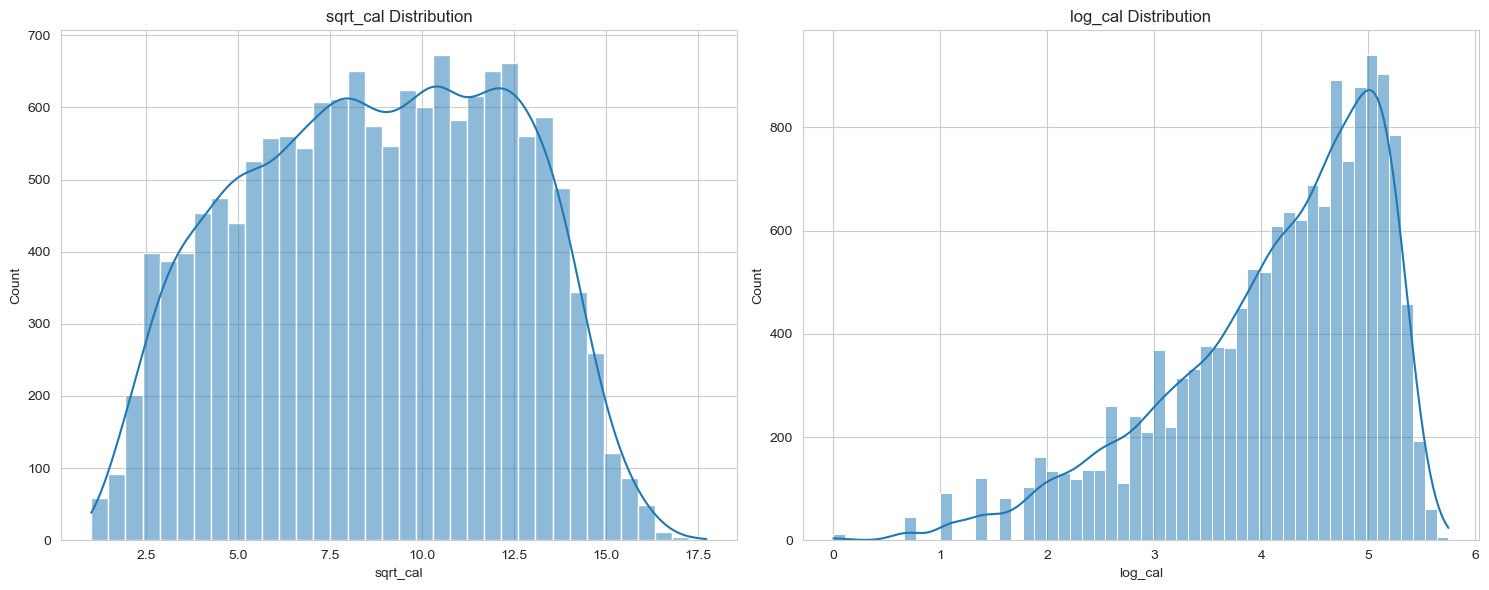

In [14]:
#Visualize the new tranformed columns to see which is well distributed.

#transformed columns
t_cols = ['sqrt_cal', 'log_cal']

#histplot
fig, axes = plt.subplots(1,2, figsize=(15,6))
axes = axes.flatten()

for i, col in enumerate(t_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

Comparing the sqrt and the log transformation, it can be deduced that the sqrt is the best transformation for the calories data,the sqrt transformation displays the data to be normally distributed, hence we would drop off the log_cal from the dataset

In [15]:
#drop the log_cal column
df.drop(columns=['log_cal'], inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,sqrt_cal
0,14733363,male,68,190,94,29,105,40.8,231,15.198684
1,14861698,female,20,166,60,14,94,40.3,66,8.124038
2,11179863,male,69,179,79,5,88,38.7,26,5.099020
3,16180408,female,34,179,71,13,100,40.5,71,8.426150
4,17771927,female,27,154,58,10,81,39.8,35,5.916080


In [16]:
#Check the correlation of the numerical column

corr_matrix = df[num_col].corr()
corr_matrix

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


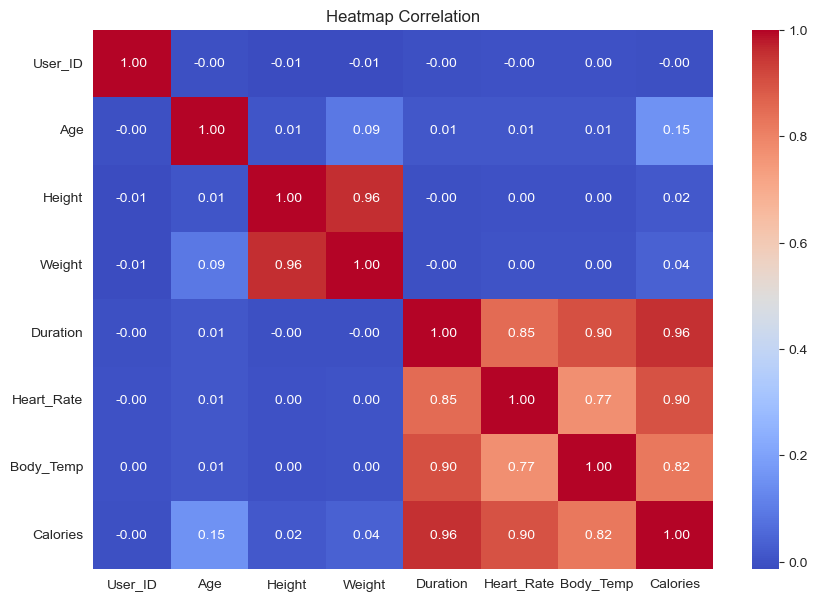

In [17]:
#Visualize the correlation

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, fmt=' .2f', cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.show()

From the correlation above, we can deduce the following;

- we can notice multicolinearity between the duration, heart_rate and body temp columns, we can also notice the same on the height and weight column.
- It can be solved by either dropping some columns or by using the PCA 

### FEATURE ENGINEERING

Creating of new colums categories by using the pd.cut(), also creating a new Bmi column by using the Bmi formula.  

In [18]:
#Creating a new Bmi column by using the Bmi formula

df['Bmi'] = df['Weight']//(df['Height'] / 100) ** 2

In [19]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,sqrt_cal,Bmi
0,14733363,male,68,190,94,29,105,40.8,231,15.198684,26.0
1,14861698,female,20,166,60,14,94,40.3,66,8.124038,21.0
2,11179863,male,69,179,79,5,88,38.7,26,5.099020,24.0
3,16180408,female,34,179,71,13,100,40.5,71,8.426150,22.0
4,17771927,female,27,154,58,10,81,39.8,35,5.916080,24.0


In [20]:
#Check the values of the Age column
df['Age'].unique()

array([68, 20, 69, 34, 27, 36, 33, 41, 60, 26, 21, 66, 32, 53, 39, 46, 50,
       67, 31, 48, 29, 42, 62, 38, 25, 24, 22, 74, 70, 44, 61, 63, 54, 47,
       35, 28, 77, 64, 45, 57, 49, 40, 55, 23, 43, 52, 79, 51, 59, 30, 37,
       56, 58, 78, 73, 76, 72, 65, 71, 75], dtype=int64)

In [21]:
#Create a new Age_Group column

df['Age_Group'] = pd.cut(
    df['Age'],
    bins= [0, 20, 39, 60, 100],
    labels= ['Young Adult', 'Adult', 'Middle Aged', 'Aged']
)

In [22]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,sqrt_cal,Bmi,Age_Group
0,14733363,male,68,190,94,29,105,40.8,231,15.198684,26.0,Aged
1,14861698,female,20,166,60,14,94,40.3,66,8.124038,21.0,Young Adult
2,11179863,male,69,179,79,5,88,38.7,26,5.099020,24.0,Aged
3,16180408,female,34,179,71,13,100,40.5,71,8.426150,22.0,Adult
4,17771927,female,27,154,58,10,81,39.8,35,5.916080,24.0,Adult


In [23]:
#Check the values of the Height column
df['Height'].unique()

array([190, 166, 179, 154, 151, 158, 175, 186, 146, 177, 157, 171, 182,
       156, 169, 188, 189, 148, 165, 176, 173, 159, 183, 160, 184, 155,
       195, 152, 193, 168, 174, 191, 164, 198, 170, 167, 185, 163, 192,
       178, 197, 187, 144, 202, 201, 181, 136, 180, 194, 143, 149, 172,
       153, 147, 199, 161, 204, 203, 145, 200, 150, 162, 205, 208, 209,
       206, 140, 132, 196, 207, 212, 135, 133, 139, 138, 217, 211, 142,
       137, 213, 210, 141, 123, 214, 127, 218, 126, 134, 222, 219],
      dtype=int64)

In [24]:
#create a new Height_Group column

df['Height_Group'] = pd.cut(
    df['Height'],
    bins= [0, 140, 170, 180, 200, 250],
    labels=['Very Short', 'Short', 'Medium', 'Tall', 'Very Tall']

)

In [25]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,sqrt_cal,Bmi,Age_Group,Height_Group
0,14733363,male,68,190,94,29,105,40.8,231,15.198684,26.0,Aged,Tall
1,14861698,female,20,166,60,14,94,40.3,66,8.124038,21.0,Young Adult,Short
2,11179863,male,69,179,79,5,88,38.7,26,5.099020,24.0,Aged,Medium
3,16180408,female,34,179,71,13,100,40.5,71,8.426150,22.0,Adult,Medium
4,17771927,female,27,154,58,10,81,39.8,35,5.916080,24.0,Adult,Short


In [26]:
#Check the values of the Bmi column
df['Bmi'].unique()

array([26., 21., 24., 22., 27., 23., 25., 20., 28., 19., 29.])

In [27]:
#Create a Bmi_Cat column

df['Bmi_cat'] = pd.cut(
    df['Bmi'],
    bins= [0, 18.5, 24.9, 29.9, 39.9, 100],
    labels= ['Under weight', 'Normal weight', 'Over weight', 'Obesity','Morbid Obesity']
)

In [28]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,sqrt_cal,Bmi,Age_Group,Height_Group,Bmi_cat
0,14733363,male,68,190,94,29,105,40.8,231,15.198684,26.0,Aged,Tall,Over weight
1,14861698,female,20,166,60,14,94,40.3,66,8.124038,21.0,Young Adult,Short,Normal weight
2,11179863,male,69,179,79,5,88,38.7,26,5.099020,24.0,Aged,Medium,Normal weight
3,16180408,female,34,179,71,13,100,40.5,71,8.426150,22.0,Adult,Medium,Normal weight
4,17771927,female,27,154,58,10,81,39.8,35,5.916080,24.0,Adult,Short,Normal weight


### DATA PREPARATION

- Features(X) = The independent variables used to predict the outcome, and in this case the independent variables would be the (Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp) columns.

- Target(y) = The dependent variable (what you're trying to predict), in this case is the (sqrt_cal) column.

In [29]:
#split into target and features first
X = df.drop(columns=['User_ID','Bmi','Calories','Bmi_cat','sqrt_cal', 'Age_Group', 'Height_Group'])
y = df['sqrt_cal']

#import the required library for splitting into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [31]:
#create numerical and categorical 
num_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','Body_Temp']
cat_cols = ['Gender']

In [32]:
#Build Preprocessor Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

PCA_transformer = Pipeline(steps=[
    ('pca', PCA())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols),
    ('pca', PCA_transformer, ['Duration', 'Heart_Rate', 'Body_Temp'])
])

In [33]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Height', 'Weight', 'Duration',
                                  'Heart_Rate', 'Body_Temp']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender']),
                                ('pca', Pipeline(steps=[('pca', PCA())]),
                                 ['Duration', 'Heart_Rate', 'Body_Temp'])])

### MODEL TRAINING

In [34]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

#models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Xgboost': XGBRegressor()
}

#store results
result = {
    'Models': [],
    'Test Score' : [],
    'Train Score' : [],
    'MAE' : [],
    'RMSE' : []
}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('Regressor', model)
    ])
    
    #train 
    pipeline.fit(X_train, y_train)

    #predict
    test_pred = pipeline.predict(X_test)
    train_pred = pipeline.predict(X_train)

    #results
    test_score = r2_score(test_pred, y_test)
    train_score = r2_score(train_pred, y_train)
    mae = mean_absolute_error(test_pred, y_test)
    rmse = root_mean_squared_error(test_pred, y_test)

    #append results
    result['Models'].append(name)
    result['Test Score'].append(test_score)
    result['Train Score'].append(train_score)
    result['MAE'].append(mae)
    result['RMSE'].append(rmse)

In [35]:
df_results = pd.DataFrame(result)
df_results

,Models,Test Score,Train Score,MAE,RMSE
0,Linear Regression,0.988766,0.988332,0.301712,0.378589
1,Random Forest,0.998598,0.999781,0.095835,0.134293
2,Xgboost,0.999130,0.999668,0.081318,0.106106


In [36]:
#Select best model
best_model = df_results.loc[df_results['Test Score'].idxmax(), 'Models']

In [37]:
best_model = models[best_model]

In [38]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
final_model = pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', best_model)
    ])

In [40]:
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender']),
                                                 ('pca',
                                                  Pipeline(steps=[('pca',
                                                                   PCA())]),
                                                  ['Duration', 'Heart_Rate'...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [41]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender']),
                                                 ('pca',
                                                  Pipeline(steps=[('pca',
                                                                   PCA())]),
                                                  ['Duration', 'Heart_Rate'...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])